## Ch03.기계학습의 기초
### 2020/05/21 Keonwoo Park


### 데이터 가져오기

In [31]:
## 1. 기본
import numpy as np # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2. 데이터 가져오기
from sklearn import datasets # python 저장 다에터 가져오기

## 3. 데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

## 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 5. 분류모델구출
from sklearn.tree import DecisionTreeClassifier # 결정트리
from sklearn.naive_bayes import GaussianNB # 나이브 베이즈
from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.linear_model import Perceptron # 퍼셉트론
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀모델
from sklearn.svm import SVC # 서포트 벡터
from sklearn.neural_network import MLPClassifier # 다층 인공 신경망

## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer # 정확도, 민감도 등
from sklearn.metrics import roc_curve # ROC 곡선그리기


In [1]:
import pandas as pd

In [2]:
rm_df = pd.read_csv("RidingMowers.csv")

In [5]:
rm_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [6]:
rm_df.shape

(48, 3)

In [8]:
rm_df.keys()

Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')

### 2.2 data와 target으로 분리
#### 필요한 데이터를 추출
#### data:X, target:y 로 분리

In [9]:
X = rm_df.drop(["Ownership"],axis=1)
X.head()

,Income,Lot_Size
0,60.0,18.4
1,85.5,16.8
2,64.8,21.6
3,61.5,20.8
4,87.0,23.6


In [10]:
y = rm_df["Ownership"]
y.head()

0    Owner
1    Owner
2    Owner
3    Owner
4    Owner
Name: Ownership, dtype: object

### 3.데이터 전처리
#### 3.1 data(X) 레이블 인코딩
#### 문자형 자료를 숫자(범주형)로 인식하게함
#### 숫자형 자료를 표준화
#### 결정나무, 랜덤 포레스트, 나이브 베이즈 분류: 원본데이터유지

### 3.2 Class(target) 레이블 인코딩

In [13]:
class_le = LabelEncoder()
y = class_le.fit_transform(y) # 알파벳순으로 0, 1을 나눔
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

### 4.훈련/검증용 데이터 분할
#### test_size: 검증데이터30%
#### random_state: random seed 번호 = 1
#### stratify: y(클래스)의 비율에 따라 분할 (0과 1개수의 비율로 분할하겠다)

In [14]:
# \ 이후에 space 없어야한다.

X_train, X_test, y_train, y_test = \
        train_test_split(X, y,
                        test_size=0.3,
                         random_state=1,
                         stratify=y)

## 5.모델구축

In [70]:
tree = DecisionTreeClassifier(criterion='gini',
                             max_depth=1,
                             random_state=1)
tree.fit(X_train, y_train) #모델을 돌리는 것. 예측값, 결과값

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## 6.모델 검정
### 6.1 검증용 데이터로 예측
#### tree.predict (class의 결과 값으로 표시) 
#### tree.predict_proba (확률 값으로 표시)

In [71]:
y_pred = tree.predict(X_test) # train값으로 훈련을하고 test값으로 맞는지 확인한다.
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [72]:
y_test

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [73]:
y_pred_p = tree.predict_proba(X_test)
y_pred_p # 0일확률과 1일확률을 보여줌. 보통은 확률보다는 결과만확인함.

array([[0.23529412, 0.76470588],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ]])

## 6.2 정오분류표로 검정

In [68]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index = ["True[0]","True[1]"],
                      columns=["Predict[0]","Predict[1]"])

In [69]:
confmat # 0은 7개 중에 5개를 맞춘 것,
        # 1은 8개 중에 3개를 맞춘것.

,Predict[0],Predict[1]
True[0],5,2
True[1],3,5


In [47]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.71      0.62      0.67         8

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.67        15
weighted avg       0.67      0.67      0.67        15



## 6.3 정확도, 민감도 확인
#### 클래스가 2개일 경우에만 실행
#### 클래스는 문자데이터를 숫자로 변환한 값들 남,녀 -> 0, 1

In [48]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print("정확도: %.3f" % accuracy_score(y_test, y_pred))
print("정밀도: %.3f" % precision_score(y_test, y_pred))
print("재현율: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

잘못 분류된 샘플 개수: 5
정확도: 0.667
정밀도: 0.714
재현율: 0.625
F1: 0.667


## 부록: 훈련데이터 검증할 때

In [49]:
y_pred_t = tree.predict(X_train)
y_pred_t

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [50]:
confmat = pd.DataFrame(confusion_matrix(y_train, y_pred_t),
                      index = ["True[0]","True[1]"],
                      columns=["Predict[0]","Predict[1]"])

In [52]:
confmat

,Predict[0],Predict[1]
True[0],13,4
True[1],3,13


## 6.4 ROC 그리기


In [53]:
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

In [55]:
fpr, tpr, thresholds

(array([0.        , 0.28571429, 1.        ]),
 array([0.   , 0.625, 1.   ]),
 array([1.76470588, 0.76470588, 0.1875    ]))

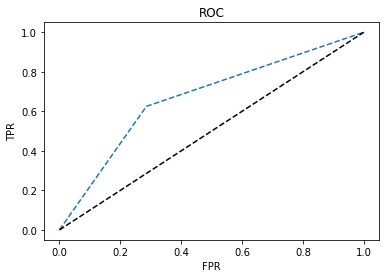

In [63]:
plt.plot(fpr, tpr, '--' ,label="Decision Tree")
plt.plot([0,1],[0,1], 'k--', label="random guess")
plt.plot([fpr],[tpr], 'r-', ms=10)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title("ROC")
plt.show()